In [ ]:
# Music and Depression- DS110 Final Project
# Nora Amer, Kyosuke Asano, Mark Castro, Srushti Karve

In [ ]:
#importing and uploading our file
import pandas as pd
import numpy as np
from google.colab import files
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split
import matplotlib.pyplot as plt
import matplotlib
from sklearn import tree

uploaded = files.upload()

Saving mxmh_survey_results.csv to mxmh_survey_results.csv


In [ ]:
#loading our df, df2 is a copy of the original with nothing changed
df = pd.read_csv('mxmh_survey_results.csv', index_col = 'Timestamp')
df2 = pd.read_csv('mxmh_survey_results.csv', index_col = 'Timestamp') #DF2 is unchanged from the original
df2.head(2)

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
Timestamp,,,,,,,,,,,,,,,,,,,,,
8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,156.0,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,119.0,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.


In [ ]:
#dropping irrelevant columns, normalizing some categorical data to prepare for ML
df = df.drop(["Permissions", "Music effects"], axis=1) #dropping irrelevant columns

#changing all the frequency from "Never, Rarely, Sometimes, and Very Frequently" to 0, 1/3, 2/3, 1
def columnnormalizer(x):

  if x == "Never":
    x = 0
  elif x == "Rarely":
    x = 1
  elif x == "Sometimes":
    x = 2
  elif x == "Very frequently":
    x = 3
  return x

L = ["Frequency [Classical]", 'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
     "Frequency [Gospel]", 'Frequency [Hip hop]', 'Frequency [Jazz]', "Frequency [K pop]",
     "Frequency [Latin]", "Frequency [Lofi]", 'Frequency [Metal]', "Frequency [Pop]",
     "Frequency [R&B]", "Frequency [Rap]", "Frequency [Rock]", 'Frequency [Video game music]']

for i in L:
  column1 = df[i]
  df[i] = column1.apply(columnnormalizer)

#changing all the yes/no questions to 1/0
def changeboolean(x):
  if x == "Yes":
    x = 1
  elif x == "No":
    x = 0
  return x

LL = ["While working", "Instrumentalist", "Composer", "Exploratory", "Foreign languages"]
for i in LL:
  column1 = df[i]
  df[i] = column1.apply(changeboolean)

In [ ]:
#making MLDF, our Machine Learning Data Frame
mldf = df.dropna()
pd.set_option('display.max_rows', 15)
mldf = mldf[mldf["BPM"] < 1000]
mldf.head()

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD
Timestamp,,,,,,,,,,,,,,,,,,,,,
8/27/2022 19:29:02,18.0,Spotify,3.0,1.0,1.0,1.0,Latin,1,1.0,156.0,...,0,3,2,3,0,2,3.0,0.0,1.0,0.0
8/27/2022 19:57:31,63.0,Pandora,1.5,1.0,0.0,0.0,Rock,1,0.0,119.0,...,0,2,2,1,3,1,7.0,2.0,2.0,1.0
8/27/2022 21:28:18,18.0,Spotify,4.0,0.0,0.0,0.0,Video game music,0,1.0,132.0,...,2,1,0,1,1,3,7.0,7.0,10.0,2.0
8/27/2022 21:40:40,61.0,YouTube Music,2.5,1.0,0.0,1.0,Jazz,1,1.0,84.0,...,0,2,2,0,0,0,9.0,7.0,3.0,3.0
8/27/2022 21:54:47,18.0,Spotify,4.0,1.0,0.0,0.0,R&B,1,0.0,107.0,...,0,2,3,3,0,1,7.0,2.0,5.0,9.0


In [ ]:
#onehot encoding
mldf = pd.get_dummies(mldf, columns = ['Primary streaming service', ])
mldf = pd.get_dummies(mldf, columns = ['Fav genre', ])
mldf = mldf.drop(["Anxiety", "OCD", "Insomnia"], axis = 1)

In [ ]:
#changing all numbers to ints
for i in mldf.columns:
  mldf[i] = mldf[i].astype(int)

In [ ]:
#Finding out what the best max depth and leafs there are
model_data = mldf.drop(["Depression"], axis =1)
model_labels = mldf["Depression"]

expval = np.array([1,2,3,4,5,6])
expexpval = 2 ** expval
mostcommoni = []
mostcommonj = []
for k in range(0,5):
  maxscore = 0
  samplei = 0
  samplej = 0
  for i in range(1,11):
    for j in expexpval:
      L = []
      dtree = DecisionTreeClassifier(criterion = 'entropy', random_state=110, max_depth = i, max_leaf_nodes = j)
      features_train, features_test, labels_train, labels_test = train_test_split(model_data, model_labels, test_size = 0.2)
      dtreemodel = dtree.fit(features_train, labels_train)
      dtreescore = dtreemodel.score(features_train, labels_train)
      for i in range(0,5):
        L.append(dtreemodel.score(features_train, labels_train))
      if sum(L)/len(L) > maxscore:
        maxscore = sum(L)/len(L)
        samplei = i
        samplej = j
  mostcommoni.append(samplei)
  mostcommonj.append(samplej)
print(f"The best max_depth is {sum(mostcommoni)/len(mostcommoni)} and the best max_leaves is  {sum(mostcommonj)/len(mostcommonj)}")

The best max_depth is 4.0 and the best max_leaves is  32.0


In [ ]:
#decision tree code

dtree = DecisionTreeClassifier(criterion = 'entropy', random_state=110, max_depth = 4, max_leaf_nodes = 40)
features_train, features_test, labels_train, labels_test = train_test_split(model_data, model_labels, test_size = 0.2)
dtree.fit(features_train, labels_train)
print(f"the score of the test data is {dtree.score(features_test, labels_test)} and the score of the training data is {dtree.score(features_train, labels_train)}")

the score of the test data is 0.14516129032258066 and the score of the training data is 0.2439516129032258


[Text(0.5, 0.9, 'Frequency [Rap] <= 0.5\nentropy = 3.384\nsamples = 496\nvalue = [54, 25, 67, 39, 47, 36, 56, 65, 51, 24, 32]\nclass = 7'), Text(0.25, 0.7, 'BPM <= 107.5\nentropy = 3.267\nsamples = 120\nvalue = [22, 11, 19, 7, 9, 10, 9, 12, 12, 8, 1]\nclass = 0'), Text(0.125, 0.5, 'Frequency [Rock] <= 0.5\nentropy = 2.93\nsamples = 32\nvalue = [6, 5, 1, 4, 0, 5, 0, 2, 6, 2, 1]\nclass = 0'), Text(0.0625, 0.3, 'Frequency [Gospel] <= 0.5\nentropy = 2.197\nsamples = 9\nvalue = [3, 0, 0, 0, 0, 2, 0, 2, 0, 1, 1]\nclass = 0'), Text(0.03125, 0.1, '\n  (...)  \n'), Text(0.09375, 0.1, '\n  (...)  \n'), Text(0.1875, 0.3, 'Hours per day <= 2.5\nentropy = 2.583\nsamples = 23\nvalue = [3, 5, 1, 4, 0, 3, 0, 0, 6, 1, 0]\nclass = 9'), Text(0.15625, 0.1, '\n  (...)  \n'), Text(0.21875, 0.1, '\n  (...)  \n'), Text(0.375, 0.5, 'Frequency [Lofi] <= 0.5\nentropy = 3.139\nsamples = 88\nvalue = [16, 6, 18, 3, 9, 5, 9, 10, 6, 6, 0]\nclass = 7'), Text(0.3125, 0.3, 'Frequency [R&B] <= 0.5\nentropy = 2.982\nsampl

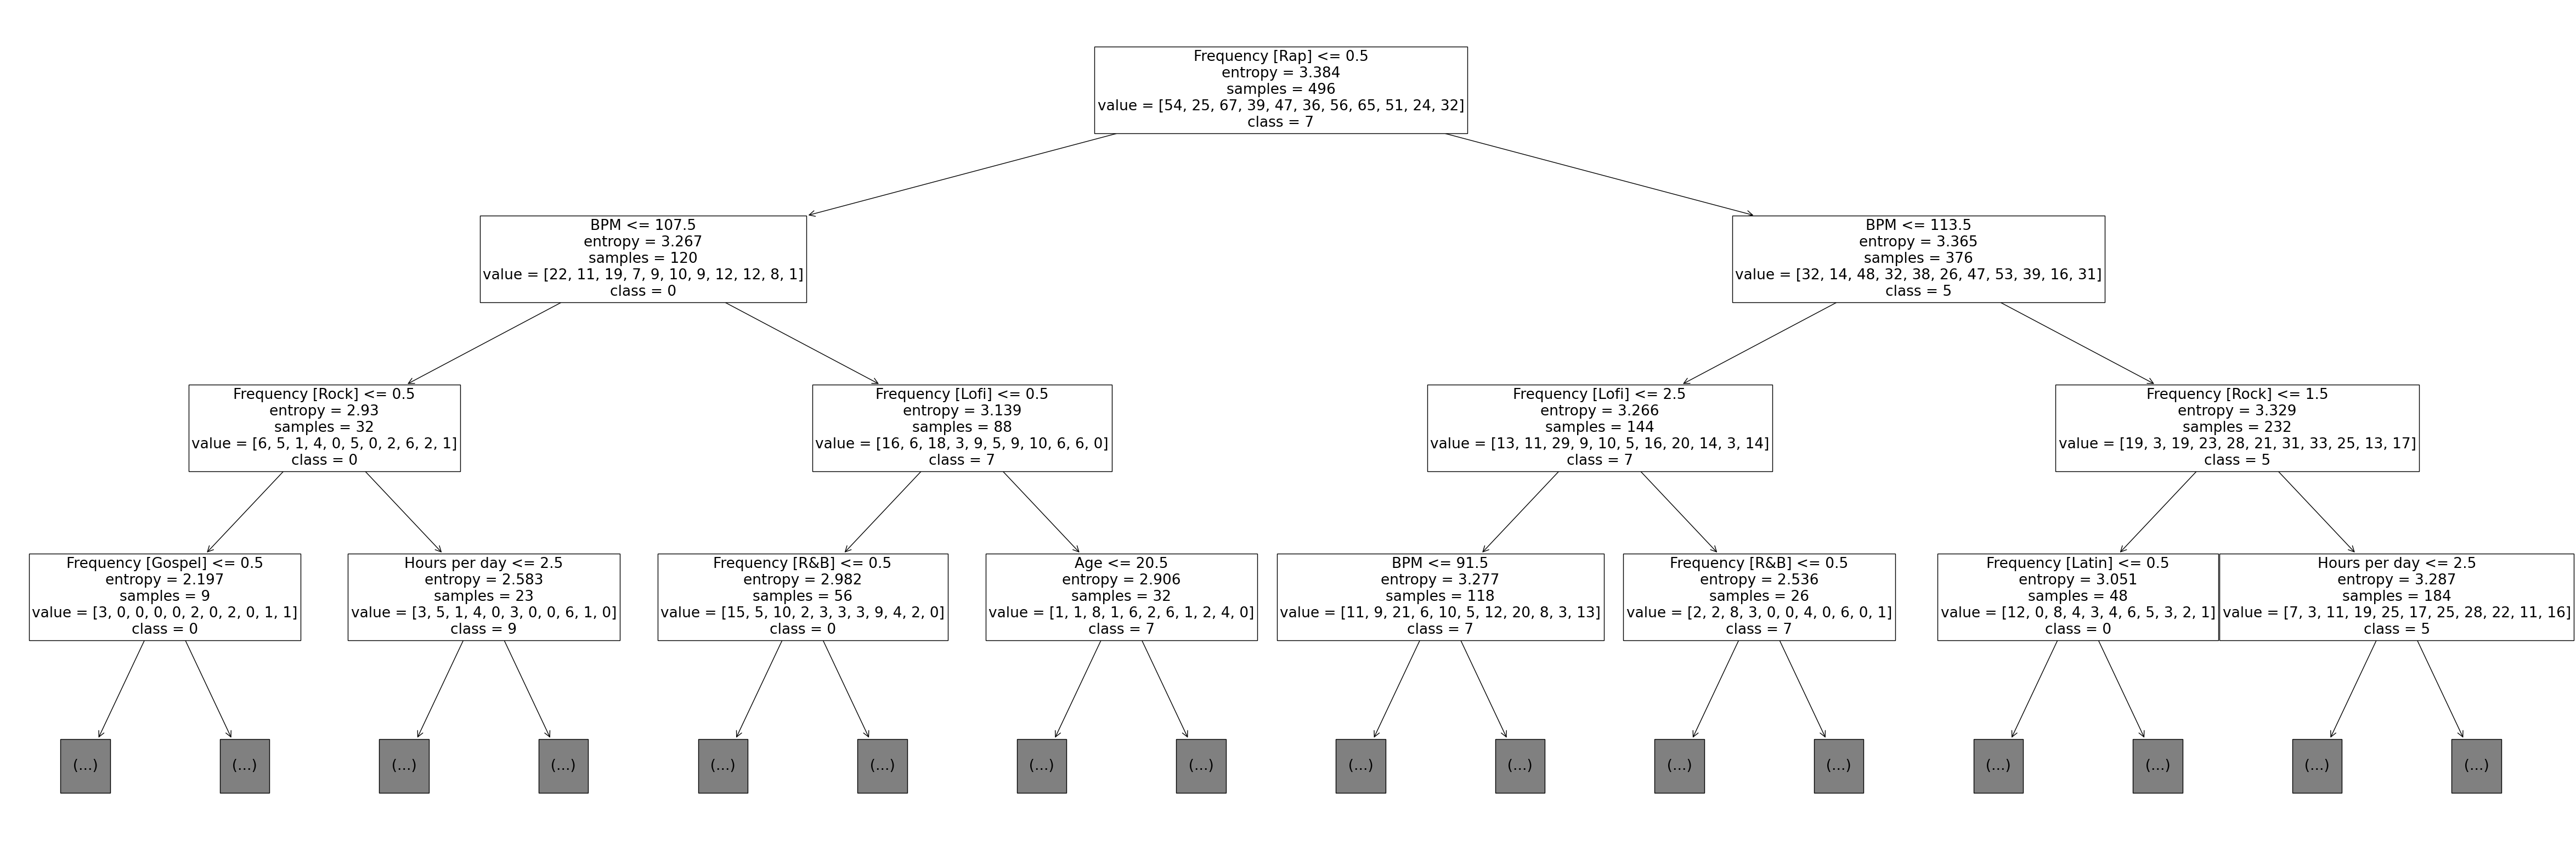

In [ ]:
#decision tree plot
classs_names = mldf["Depression"].astype(str)
fig, axe = plt.subplots(figsize=(60,20))
print(tree.plot_tree(dtree, feature_names = mldf.columns, class_names = classs_names.unique(), ax = axe, fontsize=19, max_depth = 3))

In [ ]:
 #random forest
from sklearn.ensemble import RandomForestClassifier
mldfforest = RandomForestClassifier(n_estimators = 200, max_depth = 4, max_leaf_nodes = 29)
mldfforest.fit(features_train, labels_train)
print(f" The score for the training set is {mldfforest.score(features_train, labels_train)} and the score for the testing set is {mldfforest.score(features_test, labels_test)}")

 The score for the training set is 0.4838709677419355 and the score for the testing set is 0.06451612903225806


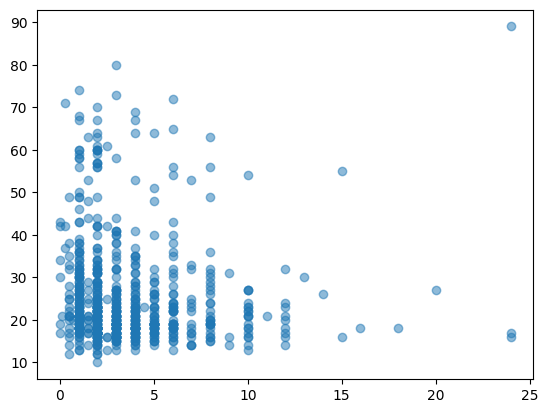

In [ ]:
#scatterplot visualization Hours per day x Age
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

plt.scatter(x = df['Hours per day'], y = df['Age'], alpha = 0.5)
plt.show()

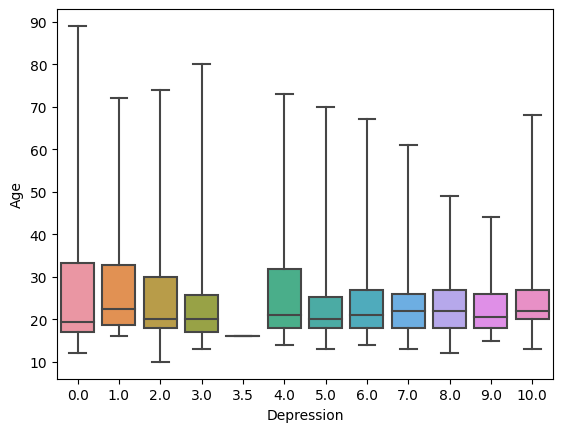

In [ ]:
#Box and Whiskerplot visualization Depression x Age
import seaborn as sns
sns.boxplot(x = df['Depression'], y = df['Age'], whis=(0,100), width=.8)
plt.show()

In [ ]:
#conducting pearsons correlation coefficient test
from scipy.stats import pearsonr
import pandas as pd
import numpy as np
x= df['Hours per day'].tolist() #x-axis = hours of music listened to per day
y = df['Depression'].tolist() #y-axis = depression levels

correlation_coefficient, p_value = pearsonr(x, y)
print(f"Pearson correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")
#pearson correlation coefficient between the two variables is 0.11052746266487755



Pearson correlation coefficient: 0.11052746266487755
P-value: 0.0026764660401031905


In [ ]:
#conducting a one-way anova test with depression levels and the frequencies of 15 different music genres listened to
import scipy.stats
from scipy.stats import f_oneway

#creating variables that incorporate the depression levels for each genre
rock_depression = df[df['Fav genre'] == 'Rock']['Depression']
pop_depression = df[df['Fav genre'] == 'Pop']['Depression']
jazz_depression = df[df['Fav genre'] == 'Jazz']['Depression']
classical_depression = df[df['Fav genre'] == 'Classical']['Depression']
country_depression = df[df['Fav genre'] == 'Country']['Depression']
EDM_depression = df[df['Fav genre'] == 'EDM']['Depression']
folk_depression = df[df['Fav genre'] == 'Folk']['Depression']
gospel_depression = df[df['Fav genre'] == 'Gospel']['Depression']
kpop_depression = df[df['Fav genre'] == 'K pop']['Depression']
hiphop_depression = df[df['Fav genre'] == 'Hip hop']['Depression']
lofi_depression = df[df['Fav genre'] == 'Lofi']['Depression']
metal_depression = df[df['Fav genre'] == 'Metal']['Depression']
rnb_depression = df[df['Fav genre'] == 'R&B']['Depression']
rap_depression = df[df['Fav genre'] == 'Rap']['Depression']
videogamemusic_depression = df[df['Fav genre'] == 'Video game music']['Depression']

#conducting one way ANOVA
f_statistic, p_value = f_oneway(rock_depression, pop_depression, jazz_depression, classical_depression, country_depression, EDM_depression, folk_depression, gospel_depression, kpop_depression, hiphop_depression,lofi_depression, metal_depression, rnb_depression, rap_depression, videogamemusic_depression)

print(f'F-statistic: {f_statistic}')
print(f'P-value: {p_value}')

#the p-value is 0.01776071849509011


F-statistic: 1.9685543866747062
P-value: 0.01776071849509011


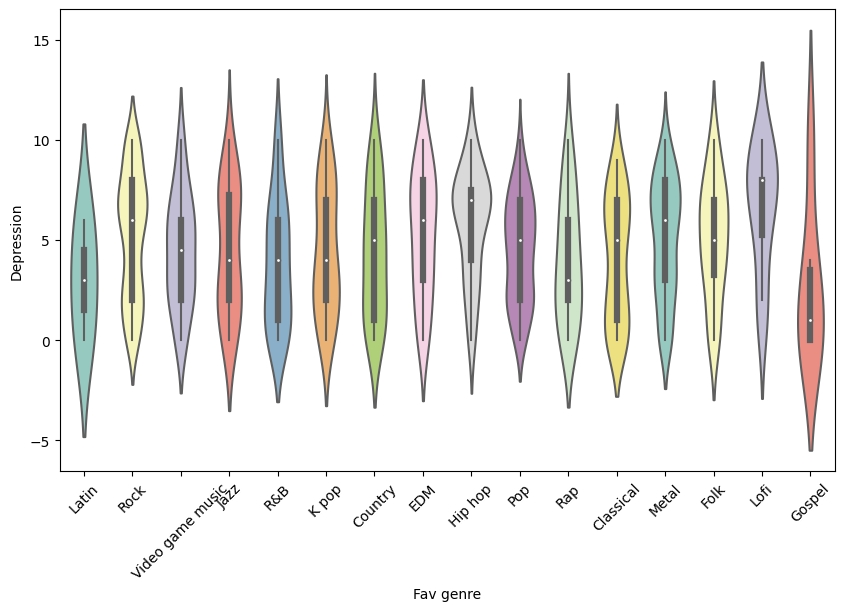

In [ ]:
#Seaborn violinplot visualization Favorite genre x Depression
plt.figure(figsize=(10, 6))
sns.violinplot(x='Fav genre', y='Depression', data=df, palette="Set3")

plt.xticks(rotation=45)

plt.show()


<ipython-input-19-27c3b9e33199>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix_dropped = df_dropped.corr()


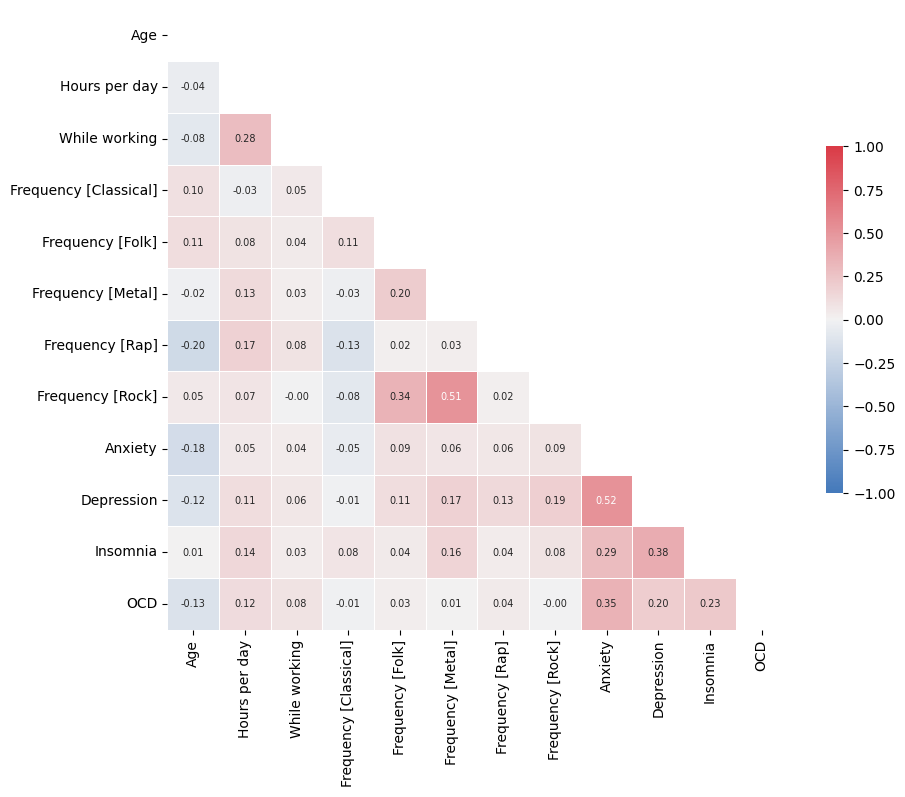

In [ ]:
#Seaborn heatmap visualization of selected columns

# Drop the columns
df_dropped = df.drop(["Instrumentalist", "Composer", "Exploratory", "Foreign languages", "BPM", "Frequency [EDM]", "Frequency [Country]", "Frequency [Gospel]", "Frequency [Hip hop]","Frequency [Jazz]","Frequency [K pop]", "Frequency [Latin]", "Frequency [Lofi]", "Frequency [Pop]", "Frequency [R&B]", "Frequency [Video game music]"], axis=1)

# Compute the correlation
corr_matrix_dropped = df_dropped.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix_dropped, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(250, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix_dropped, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
            annot=True,  fmt=".2f",annot_kws={"size": 7})

plt.show()



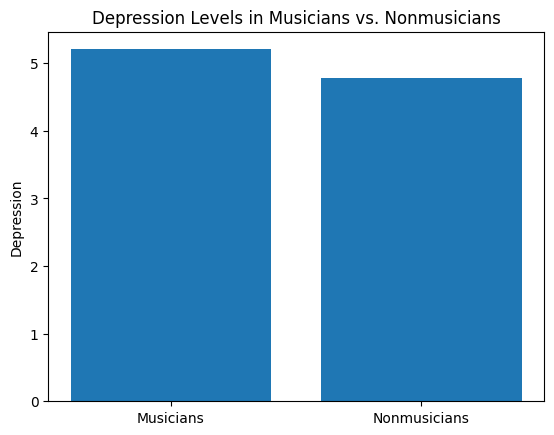

In [ ]:
#barchart of depression levels in musicians nonmusicicnas
df3 = df[(df["Composer"] == 1) & (df["Instrumentalist"] == 1)]
df5 = df[(df["Composer"] == 0) & (df["Instrumentalist"] == 0)]
df4 = {"Composer data": df3["Depression"],
       "Noncomposer data": df5["Depression"]}

average_d_composer = sum(df4["Composer data"])/len(df4["Composer data"])
average_d_noncomposer = sum(df4["Noncomposer data"])/len(df4["Noncomposer data"])

fig, ax = plt.subplots()
ax.set_title("Depression Levels in Musicians vs. Nonmusicians")
ax.set_ylabel("Depression")
hbars = ax.bar(["Musicians", "Nonmusicians"], [average_d_composer, average_d_noncomposer])